## Midterm 


###  Activity - Load the libraries

Load any necessary libraries. 

In [216]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import warnings 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.cluster import silhouette_score
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning) 

### The dataset

This dataset contains columns simulating credit bureau data. The main purpose of this analysis is to predict whether a customer can be a reliable loan customer or if they will default. It's a way to avoid default and increase a company's revenue.

Features of Dataset

- person_age - Customer Age
- person_income - Annual Income
- personhomeownership - Home ownership
- personemplength - Employment length (in years)
- loan_intent - Loan intent
- loan_grade - Loan grade
- loan_amnt- Loan amount
- loanintrat - Interest rate
- loan_status - Loan status (0 is non-default 1 is default)
- loanpercentincome - Percent income
- cbpersondefaultonfile - Historical default
- cbpresoncredhistlength - Credit history length

# Load the data

In [217]:
df = pd.read_csv("loan_data.csv", skiprows = 0)
# use skiprows to skip the first row that was incorrect 

In [218]:
#Display the first few rows using head()
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [219]:
# Find the dimensionality of the DataFrame 
print(df.shape)

(32581, 12)


The data set contains 32581 examples and 11 features plus the target variable (loan_status).

In [220]:
# Print the column names of the DataFrame df 
print(df.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


# Investigate the column data types 

In [221]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

# Missing Values

In [222]:
# Check for missing values 
df.isna().any()

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                  True
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

In [223]:
# Count the NaN under an entire DataFrame
nan_in_df = df.isnull().sum()
nan_in_df


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [224]:
print('Number of NaN values present: ' + str(nan_in_df.sum()))

Number of NaN values present: 4011


In [225]:
# count of missing values per column
pd.DataFrame({'sum_missing': df.isnull().sum()})

,sum_missing
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [226]:
#  percentage of missing values per column
df.isnull().sum() / df.shape[0] * 100.00

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

<AxesSubplot:>

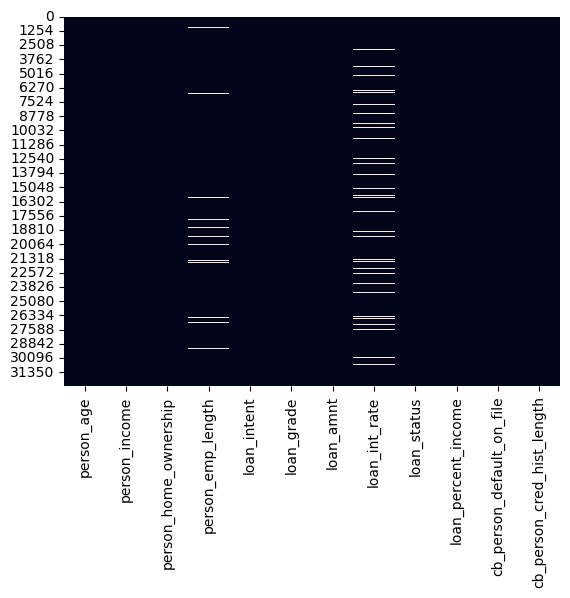

In [227]:
#now, we are checking start with a pairplot, and check for missing values
sns.heatmap(df.isnull(),cbar=False)

Thus, we detect that the column "person_emp_length"	have 895 null values as well as the column "loan_int_rate" with 3116 null values. 

In [228]:
# Drop duplicate rows with 
df.drop_duplicates(inplace=True)

In [229]:
# Sanity check: print the shape 
print(df.shape)

(32416, 12)


# Exploratory Data Analysis 

Check the loan_status (target variable y)

In [230]:
df['loan_status'].value_counts()

0    25327
1     7089
Name: loan_status, dtype: int64

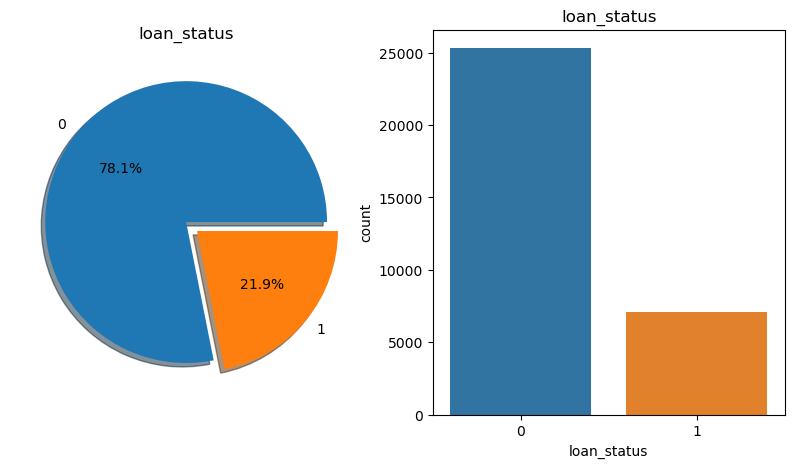

In [231]:
f, ax = plt.subplots(1,2,figsize=(10,5))
df['loan_status'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('loan_status')
ax[0].set_ylabel('')
sns.countplot(x='loan_status', data=df, ax=ax[1])
ax[1].set_title('loan_status')
plt.show()

From the above plots we can detect imbalances since in the most of the customers (78.1%) will default the loan, so they are not considered reliable. 

In [232]:
#Check the summary statistics for the Numerical Features
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


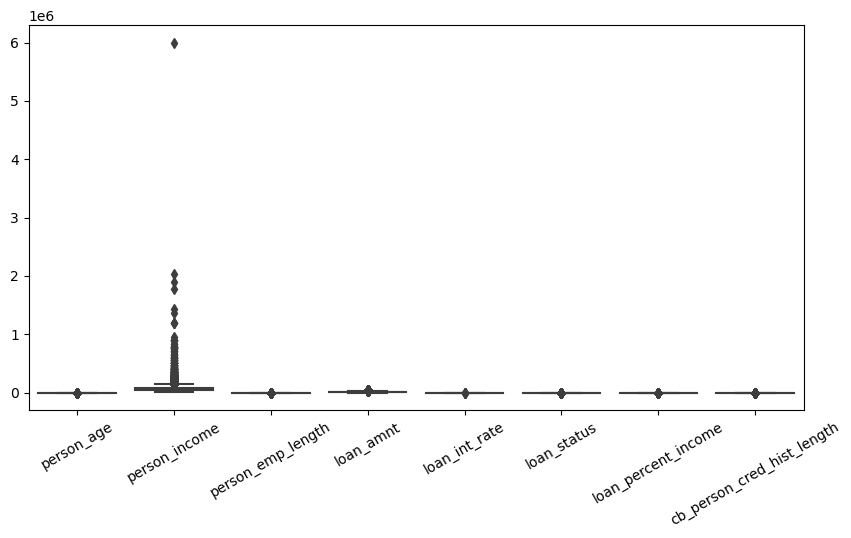

In [233]:
# Visualization using boxplot
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

In the column "person_age" we can detect that the maximum value is 	144.0 which is definately not a valid number since humans cannot live so long. Moreover, the column "person_emp_length" has a maximum value of 123 years which is not a possible number since humans cannot be working or being alive for that much years. Thus, these values can be considered as extreme values or outliers and are not considered reliable. Lastly, we can detect that the maximum values deviates significantly in comparison with the minimum values, and as a result the ranges seems to be large number. (for instance 123.00000- 0)

In [234]:
# the distribution of categorical features
df.describe(include=['O'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32416,32416,32416,32416
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16378,6411,10703,26686


# Plot the feature (Pearson) correlation coefficients in a heatmap

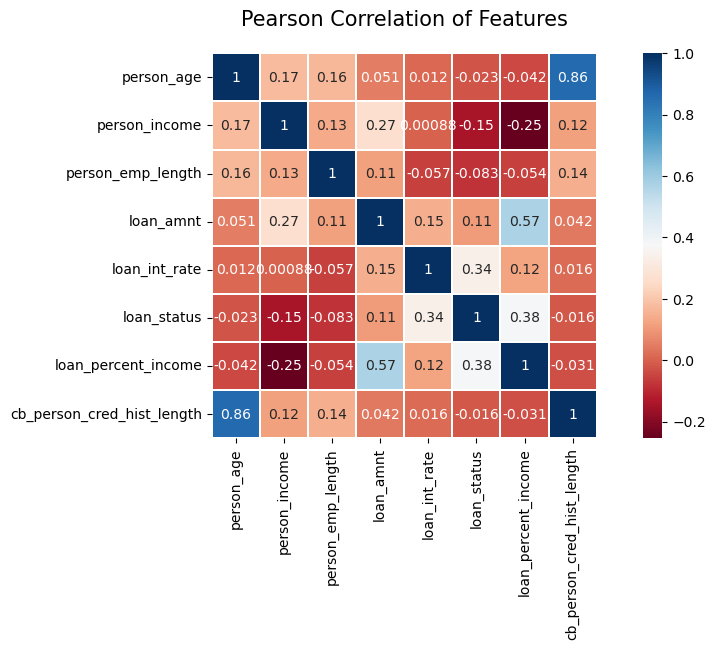

In [235]:
plt.figure(figsize=(12,5))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.show();

From the plot above, it seems significant to mention that the person's age seems to be very strong positive correlated with the feaute of Credit history length (cbpresoncredhistlength & person_age)with 86%. That means that when the people become older they have greatly higher history length.

In [236]:
# Group by and get the counts for each ‘loan_status’ per loan_intent
df2 = df.groupby(['loan_status'])['loan_intent'].count()
print(df2)

loan_status
0    25327
1     7089
Name: loan_intent, dtype: int64


In [237]:
df.groupby(['loan_intent','loan_status'])['loan_status'].count().sort_values(ascending=False)

loan_intent        loan_status
EDUCATION          0              5305
VENTURE            0              4838
MEDICAL            0              4425
PERSONAL           0              4404
DEBTCONSOLIDATION  0              3701
HOMEIMPROVEMENT    0              2654
MEDICAL            1              1617
DEBTCONSOLIDATION  1              1488
EDUCATION          1              1106
PERSONAL           1              1094
HOMEIMPROVEMENT    1               940
VENTURE            1               844
Name: loan_status, dtype: int64

The "loan intent" seems to be defaulted mostly by "MEDICAL" reason(1617 cases). Second comes the "DEBTCONSOLIDATION" intent with 1617 observations.

# Data mining and data pre-processing 

In [238]:
# keep only the rows where: 
#‘person_age’ is below (<) 100 AND the ‘person_emp_length’ is lower or equal to(<=) 50

df = df[(df['person_age'] < 100) & (df['person_emp_length'] <= 50)]

In [239]:
# Sanity check
print(df.shape)

(31522, 12)


Handle Missing Values 

In [240]:
# Let's check again (after the few changes we had made) how many null values do we have to deal with
# count of missing values per column
pd.DataFrame({'sum_missing': df.isnull().sum()})

,sum_missing
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3027
loan_status,0
loan_percent_income,0


As we can see the "loan_int_rate" have 3027 missing values. We will impute the missing values with median

In [241]:
#complete missing loan_int_rate with median
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace = True)

We have imputed missing values with median because imputing with the median is more robust than imputing with the mean, because it mitigates the effect of outliers

Now let's check again for sanity

In [242]:
pd.DataFrame({'sum_missing': df.isnull().sum()})

,sum_missing
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [243]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31522.000000,3.152200e+04,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000,31522.000000
mean,27.742529,6.650168e+04,4.782850,9663.771334,11.039917,0.215944,0.169658,5.816097
std,6.218713,5.275216e+04,4.037343,6334.787700,3.071787,0.411482,0.106296,4.063622
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.943800e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Time for Encoding

In [244]:
# Let's see the categorical features

categorical_columns = list(df.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

Categorical columns:
 ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [245]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
10,22,85000,RENT,6.0,VENTURE,B,35000,10.37,1,0.41,N,4


In [246]:
# Encode one-by-one the categorical features 

df = pd.get_dummies(df, columns=['person_home_ownership'])
df = pd.get_dummies(df, columns=['loan_intent'])
df = pd.get_dummies(df, columns=['loan_grade'])
df = pd.get_dummies(df, columns=['cb_person_default_on_file'])
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


# Split to X and y (train and test)

In [247]:
X_train = df.drop('loan_status', axis=1)
y_train = df["loan_status"]

# Print the dimensions 
print ("X dimensions: ", X_train.shape)
print ("y dimensions: ", y_train.shape)

X dimensions:  (31522, 26)
y dimensions:  (31522,)


In [248]:
# apply a 70/30 train/test split. Use random_state=0 

X_train, X_test, y_train, y_test = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.30, 
                                                    stratify = y_train, 
                                                    random_state=0)

In [249]:
# Sanity Check
print('Shape of x_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',   X_test.shape,  y_test.shape)

Shape of x_train and y_train:  (22065, 26) (22065,)
Shape of x_test and y_test:  (9457, 26) (9457,)


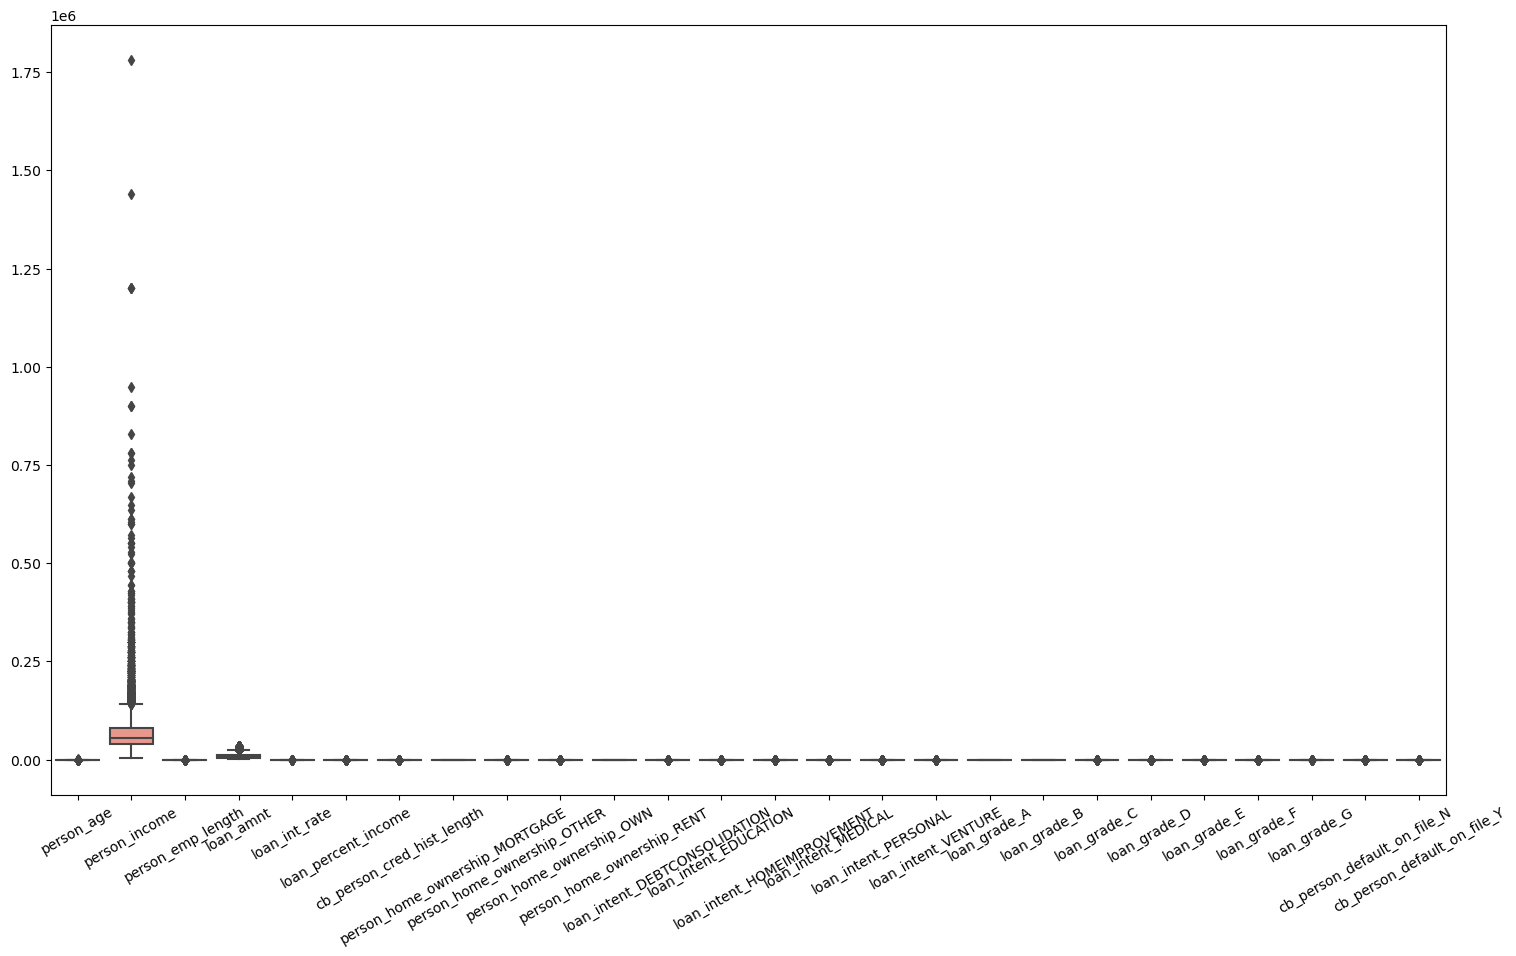

In [250]:
# Data before Scaling
plt.figure(figsize=(18,10))
ax = sns.boxplot(data=X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

# Scaling the data

In [251]:
# Instantiate the StandardScaler() or MinMaxScaler() 
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Use the fitted scaler to transform the test data 
X_test  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

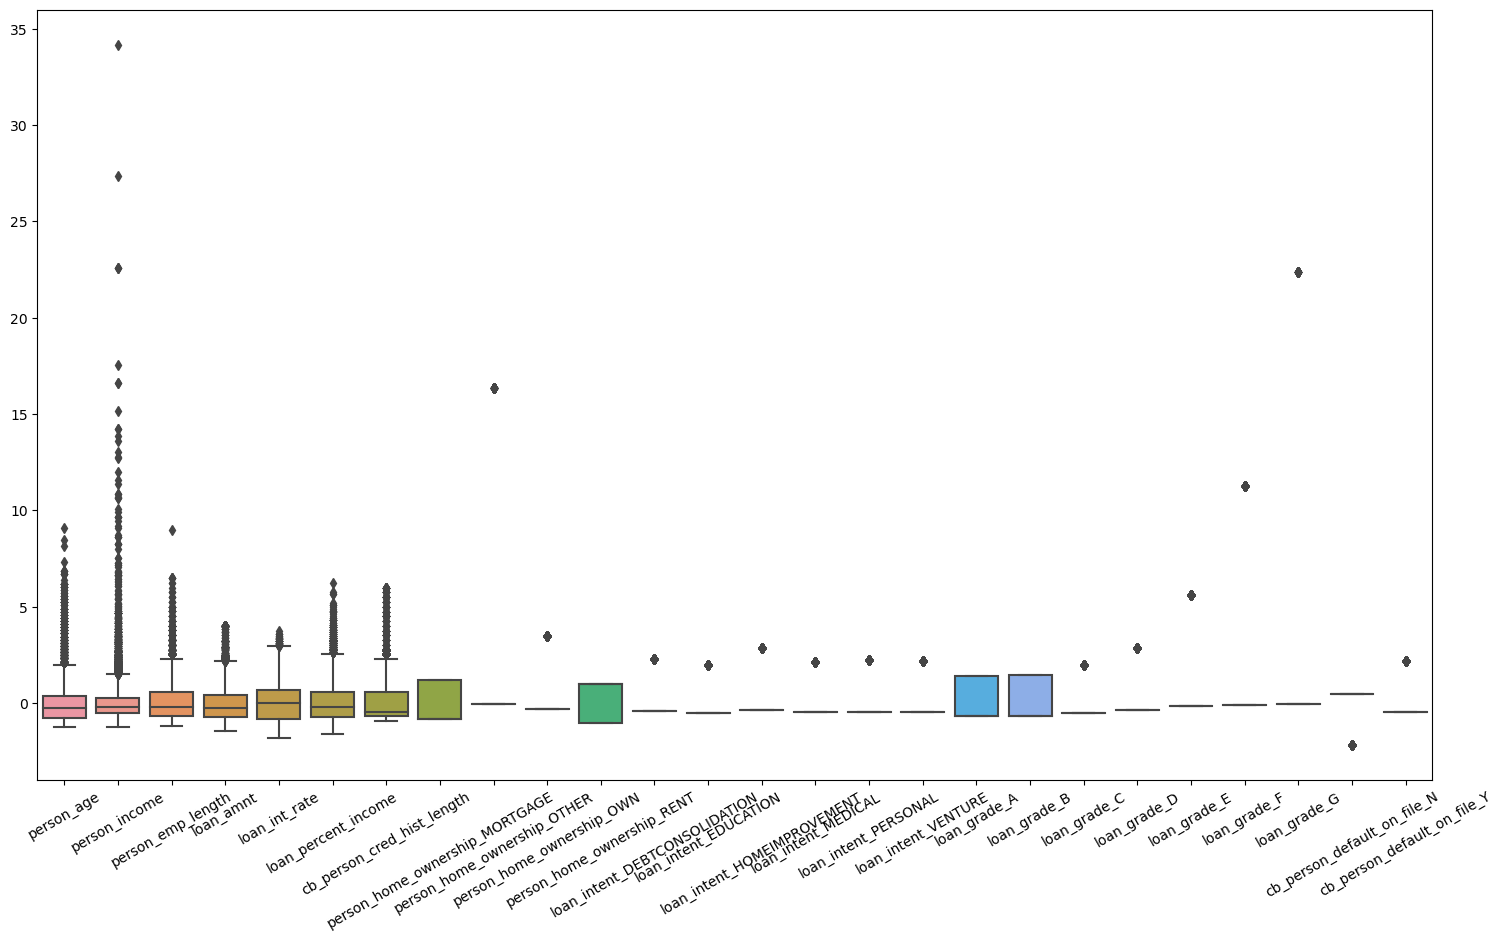

In [252]:

plt.figure(figsize=(18,10))
ax = sns.boxplot(data= X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

In this plot we can detect that our features are now scaled

# Create two classification models using their default parameters

# KNN Classification Model 

In [253]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [254]:
print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred_knn))

Test set accuracy:  0.8983821507877763


In [255]:
print(metrics.confusion_matrix(y_test, y_pred_knn))

[[7212  203]
 [ 758 1284]]


In [256]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7415
           1       0.86      0.63      0.73      2042

    accuracy                           0.90      9457
   macro avg       0.88      0.80      0.83      9457
weighted avg       0.90      0.90      0.89      9457



# Hyperparameter tuning for KNN with RandomizedSearchCV( )

In [257]:
# Create the dictionary of model hyperparameters
n_neighbors = np.arange(1, 101, 2)  
weights     = ['uniform', 'distance']
metric      = ['minkowski','euclidean','manhattan']

# Convert to dictionary
knn_param_grid = dict(n_neighbors = n_neighbors, weights = weights, metric = metric)
knn_param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
        69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
 'weights': ['uniform', 'distance'],
 'metric': ['minkowski', 'euclidean', 'manhattan']}

In [265]:
cv_knn = RandomizedSearchCV(KNeighborsClassifier(), 
                           param_distributions=knn_param_grid, 
                           n_iter = 5,
                           cv = 5,
                           n_jobs = -1,
                           random_state=0)

# Fit the  random search model to X_train and y_train 
cv_knn.fit(X_train, y_train)

# Report the optimal parameters using 'cv_rf.best_params_'
print('Best Parameters using grid search: \n', cv_knn.best_params_)


Best Parameters using grid search: 
 {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'manhattan'}


In [266]:
knn_opt = cv_knn.best_estimator_
knn_opt.fit(X_train, y_train) 
y_pred_knn_opt = knn_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_knn_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_knn_opt))

Test set accuracy:  0.904

               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7415
           1       0.89      0.63      0.74      2042

    accuracy                           0.90      9457
   macro avg       0.90      0.80      0.84      9457
weighted avg       0.90      0.90      0.90      9457



# Random Forest classifier

In [267]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Accuracy for Random Forest is ', round(metrics.accuracy_score(y_test, y_pred_rf), 3))
print('\n', metrics.classification_report(y_test, y_pred_rf))

Accuracy for Random Forest is  0.933

               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7415
           1       0.97      0.71      0.82      2042

    accuracy                           0.93      9457
   macro avg       0.95      0.85      0.89      9457
weighted avg       0.94      0.93      0.93      9457



#  Optimal RF hyperparameters with RandomizedSearchCV( )

In [269]:
# Create the dictionary of hyperparameters 
param_grid = {'n_estimators': np.arange(10, 300, 10),
              'max_features' : ['sqrt', 'log2', None], 
              'max_depth': [None, 3, 5, 10, 20], 
             }

cv_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0), 
                           param_distributions=param_grid, 
                           n_iter = 5,
                           cv = 5,
                           n_jobs = -1,
                           random_state=0)

# Fit the grid or random search model to X_train and y_train 
cv_rf.fit(X_train, y_train)

# Report the optimal parameters using 'cv_rf.best_params_'
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'n_estimators': 230, 'max_features': None, 'max_depth': 20}


In [270]:
# Build the classifier using the optimal parameters detected by the tuning process

rf_opt = cv_rf.best_estimator_
rf_opt.fit(X_train, y_train) 
y_pred_rf_opt = rf_opt.predict(X_test)

print('Test set accuracy: ', round(metrics.accuracy_score(y_test, y_pred_rf_opt), 3))
print('\n', metrics.classification_report(y_test, y_pred_rf_opt))

Test set accuracy:  0.933

               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7415
           1       0.96      0.72      0.82      2042

    accuracy                           0.93      9457
   macro avg       0.95      0.86      0.89      9457
weighted avg       0.94      0.93      0.93      9457



# Plot in a barplot the feature importance produced by the Random Forest

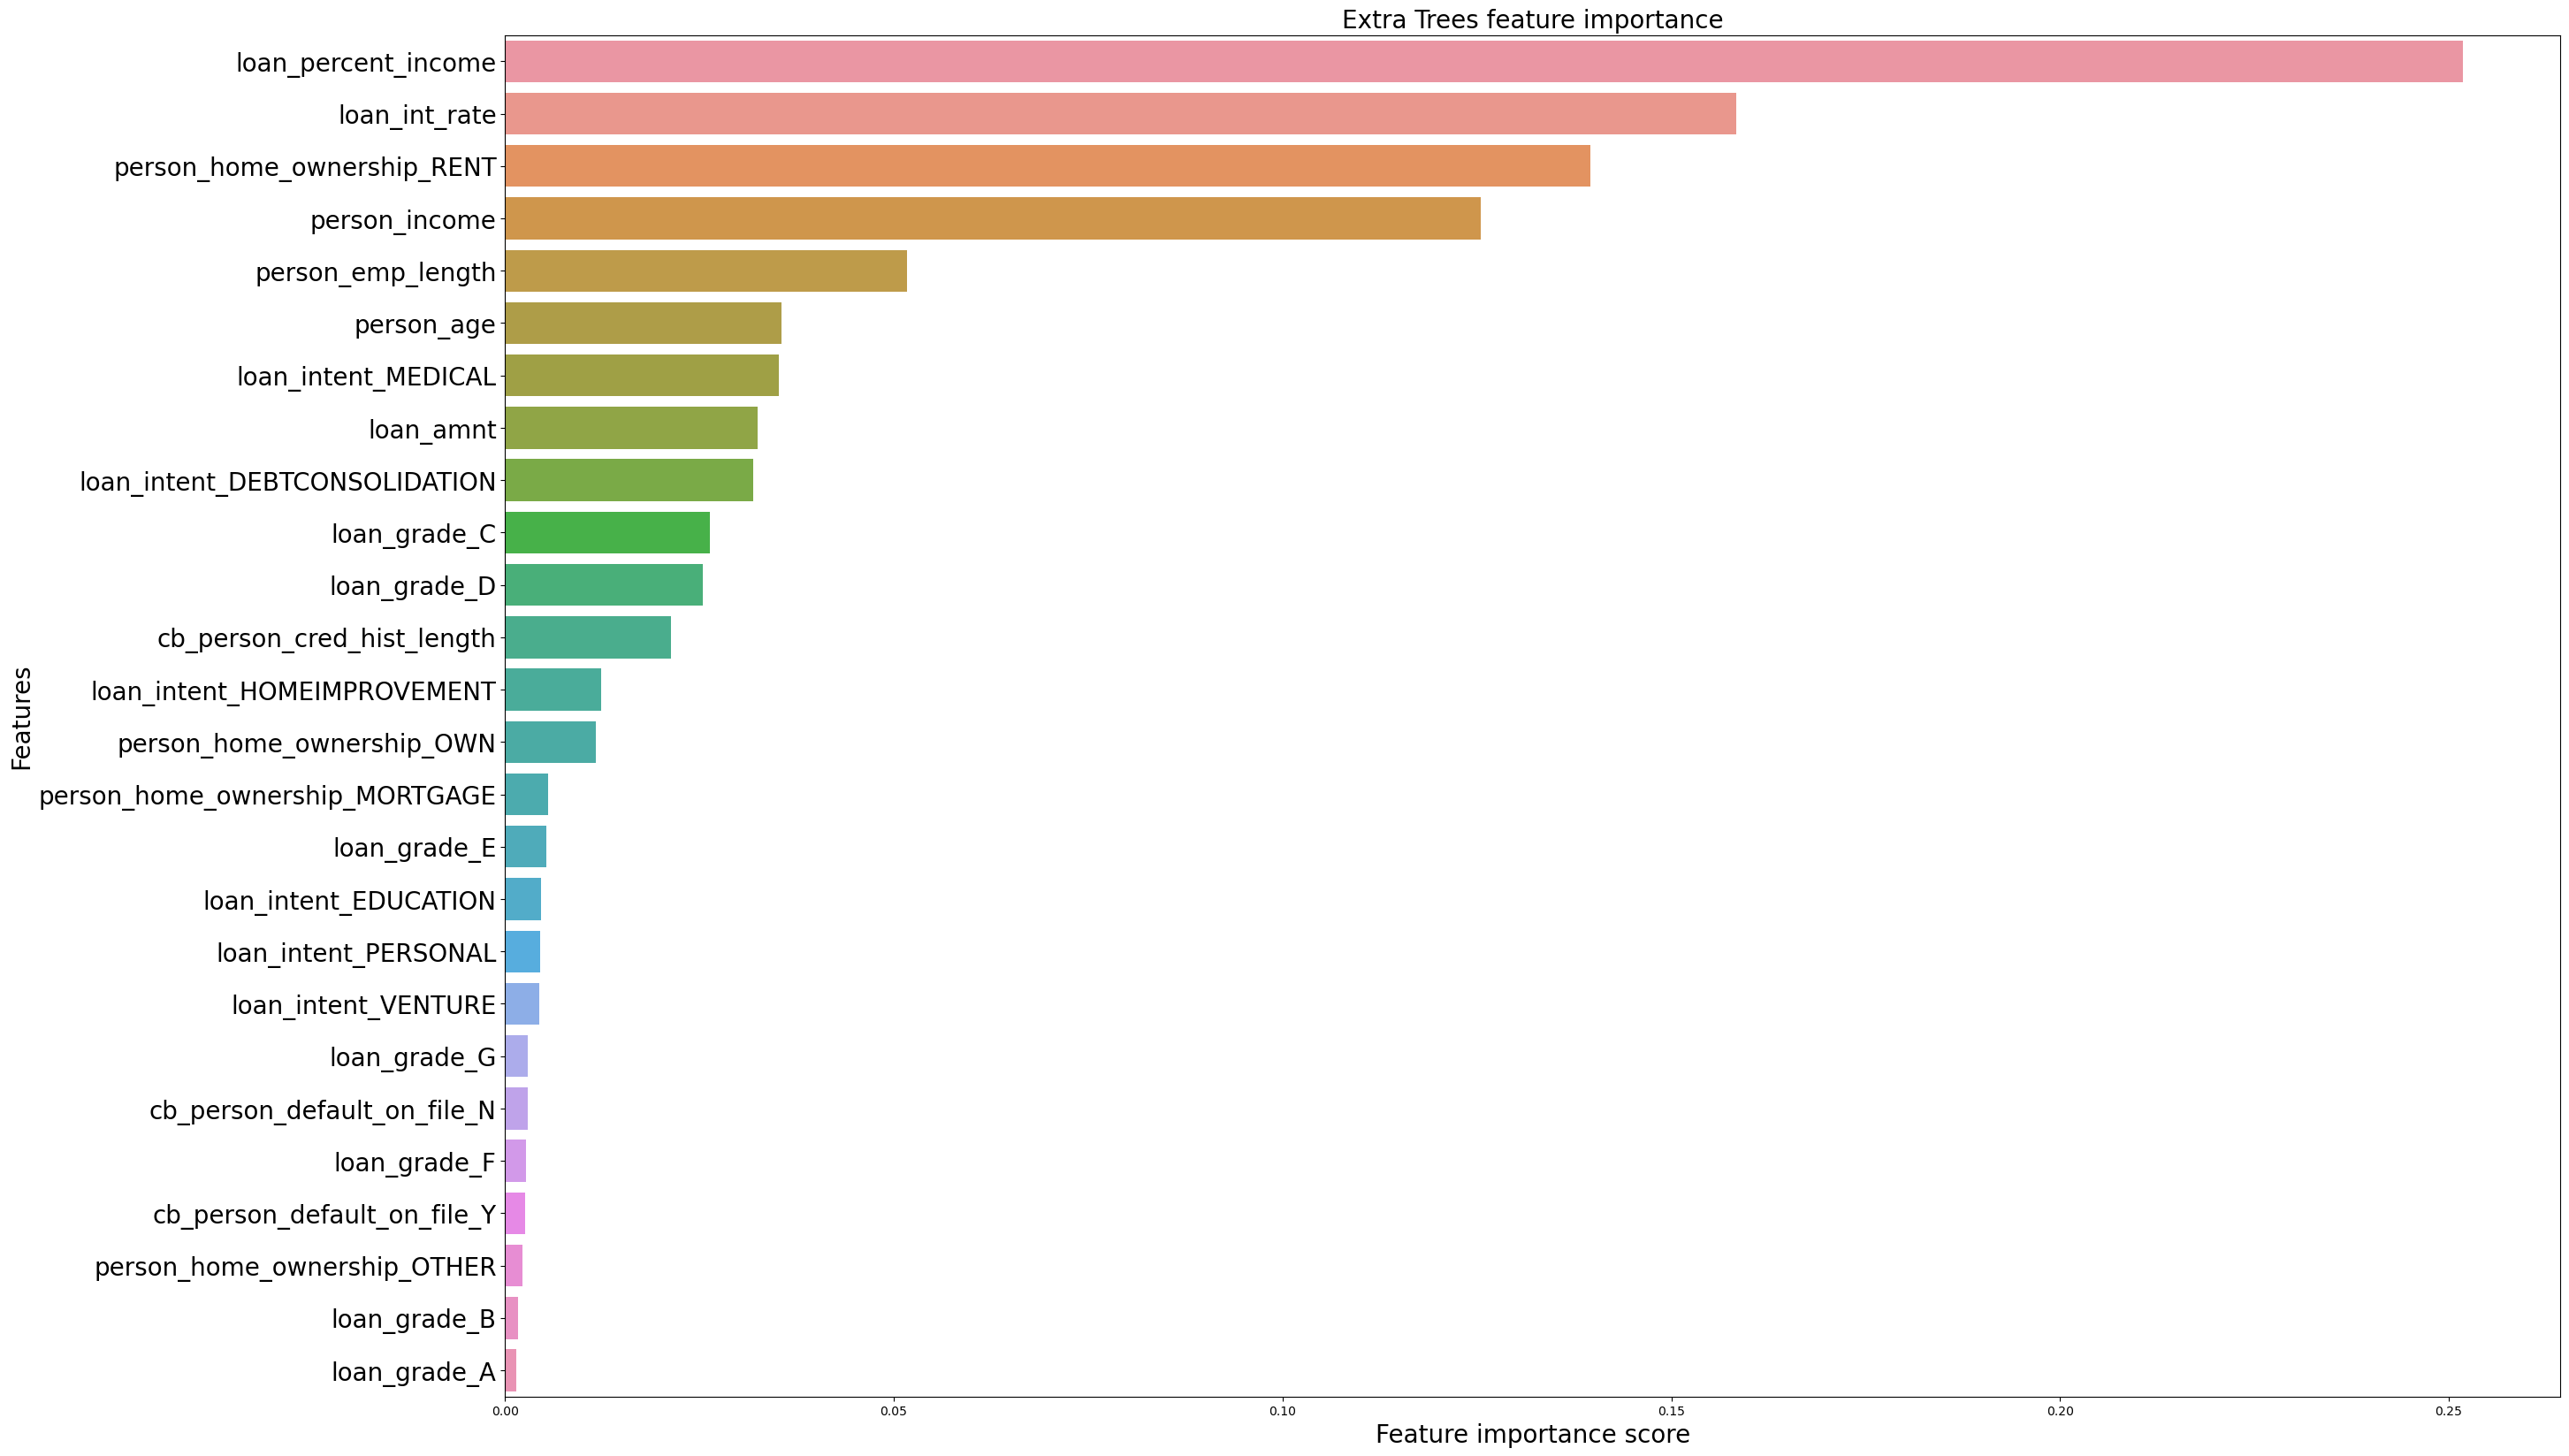

In [276]:
# Get the feature importance from the rf classifier using rf_opt.feature_importances_
# Cast it into a pd.DataFrame and use sort_values to sort by the importance 

feature_scores = pd.DataFrame(rf_opt.feature_importances_, 
                              index=X_train.columns, 
                              columns=['Importance'])
feature_scores.sort_values(by='Importance', ascending=False, inplace=True) 

# Plot the rf_opt.feature_importances_ in a barplot 
f, ax = plt.subplots(figsize=(30, 20))
ax = sns.barplot(x='Importance', y=feature_scores.index, data=feature_scores)
ax.set_title("Extra Trees feature importance", size = 20)
ax.set_yticklabels(feature_scores.index, size = 20)
ax.set_xlabel("Feature importance score", size = 20)
ax.set_ylabel("Features", size = 20)
plt.show()

From the bar plot we detect that the loan_percent_income, loan_int_rate, and person_home_ownership_REnt are the three features with the higher importance, this is very important since tells us which features are most predictive of the target variable. The features with less importance are the loan_grade_B & loan_grade_A

# Compare the models

In [277]:
clf_results = pd.DataFrame([])

In [278]:
clf_results = clf_results.append({'Model': 'Random Forest',
                                  'Accuracy': round(metrics.accuracy_score(y_test, y_pred_rf_opt),3), 
                                  'F1': round(metrics.f1_score(y_test, y_pred_rf_opt), 3)}, 
                                 ignore_index = True)

In [279]:
clf_results = clf_results.append({'Model': 'KNN',
                                  'Accuracy': round(metrics.accuracy_score(y_test, y_pred_knn_opt),3), 
                                  'F1': round(metrics.f1_score(y_test, y_pred_knn_opt), 3)}, 
                                 ignore_index = True)

In [281]:
clf_results.sort_values(by='Accuracy', ascending=False, inplace=True)
clf_results

,Model,Accuracy,F1
0,Random Forest,0.933,0.824
1,KNN,0.904,0.739


After the comparison, we can say that the Random Forest model seems to performs best in comparison to the KNN since the accuracy = 0.93 is greater than 0.904 and the F1 score is also 0.82, greater thab 0.739. 

# Unsupervised Learning  

Instantiate a PCA object using 5 Principal Components

In [282]:
# Kmeans clustering on the results of PCA
# Instantiate a PCA object using 5 Principal Components
pca = PCA(n_components=5)
pc_scores = pca.fit_transform(X_train)
pc_scores = pd.DataFrame(pc_scores, columns=["PC1", "PC2", "PC3", "PC4","PC5"])
pca.explained_variance_ratio_.cumsum()

array([0.12902557, 0.217438  , 0.28959917, 0.35712977, 0.41253378])

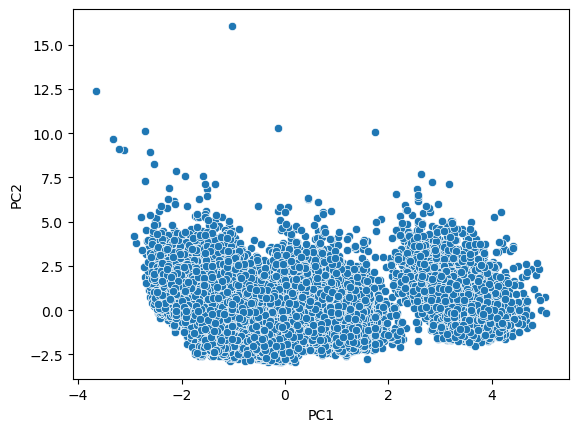

In [283]:
# Plot the 5 Principal Components (PC scores) in a scatterplot 
sns.scatterplot(x="PC1", y="PC2", data=pc_scores)
plt.show();

In [286]:
# Let's create a DataFrame that will have the principal component values
principal_df = pd.DataFrame(data = pc_scores
             , columns = ['PC1', 'PC2','PC3','PC4','PC5'])

In [287]:
principal_df.tail()

,PC1,PC2,PC3,PC4,PC5
22060,-0.666289,0.411000,0.078548,-2.890087,-0.113567
22061,3.390535,-1.088612,-1.269335,1.353738,-0.585692
22062,-2.212938,1.872876,-0.731440,0.438331,1.182122
22063,1.114725,-1.491760,0.813460,1.424030,-0.403681
22064,-1.369633,-2.332714,-0.835409,1.820628,0.226283


# Instantiate a k-means clustering object using 3 clusters

In [288]:
# Instantiate a k-means clustering object using 3 clusters.
kmodel = KMeans(n_clusters=3)
#Fit it to the PC scores output calculated from the previous step (I have named it "principal_df")
cluster_assignment = kmodel.fit_predict(principal_df)
principal_df["KMCluster"] = cluster_assignment


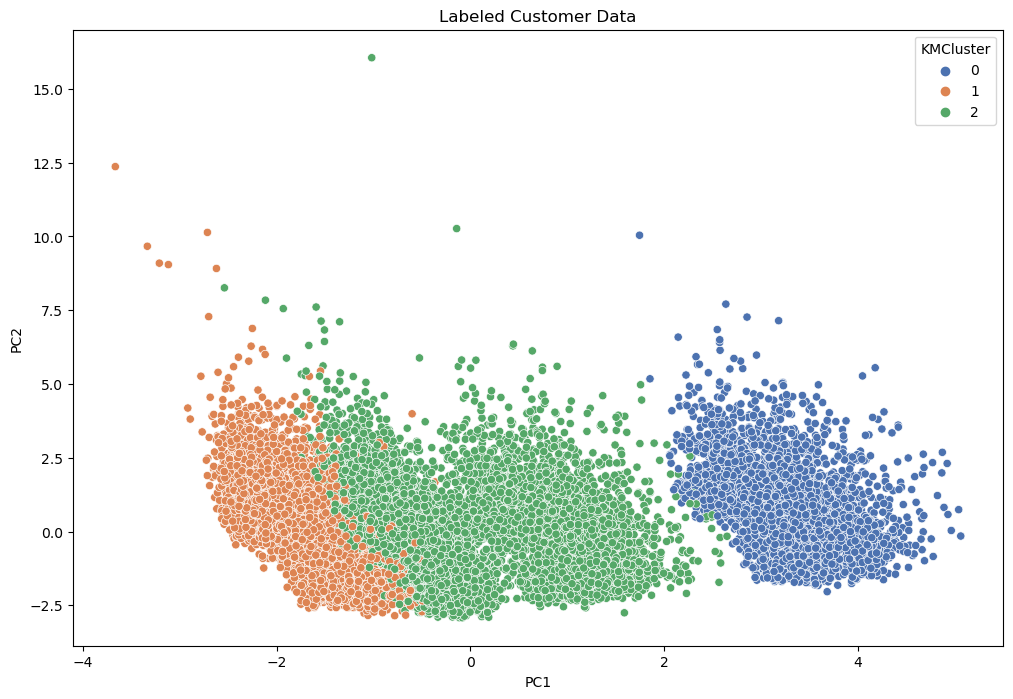

In [289]:
# Plot the 2 Principal Components (PC scores) in a scatterplot using the "KMCluster" as hue
plt.figure(figsize=(12,8))

sns.scatterplot(x='PC1', 
                y='PC2', 
                data=principal_df, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Labeled Customer Data')

plt.show()